<center>
<img src="logo.png" height="900"> 
</center>


#  Логи магазина

В файле `walmart.csv` нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.

__а)__ Подгрузите все необходимые для работы библиотеки.

In [1]:
import numpy as np         
import pandas as pd        
from scipy import stats    

import matplotlib.pyplot as plt
import seaborn as sns
   
plt.style.use('fivethirtyeight')

__б)__ Загрузите файл с данными. Отобразите первые и последние 5 наблюдений. Выведите на экран тип колонок. Приведите колонку `Date` к формату даты. В переменную `ans1` запишите число строк, которое есть в таблице. 

In [2]:
df = pd.read_csv('walmart.csv')
df.head()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [3]:
df.tail()

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
418238,45,2012-10-19,98,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

In [5]:
ans1 = df.shape[0]

In [6]:
# проверка, что задание решено корректно
assert ans1 > 418000

# Подобные тесты скрыты от вас 

__в)__ Разберитесь с пропущенными переменными: 

- Выведите на экран, сколько пропущенных значений в процентах есть в каждой переменной.
- Визуализируйте пропуски с помощью функции `sns.heatmap`. Не надо рисовать картинку сразу для всего датасета. На визуализации нам хочется посмотреть на то, как пропуски в разных переменных соотносятся друг с другом. Отберите случайные $10\%$ наблюдений из исходной таблички методом `.sample( )` и визуализируйте их. 
- Запишите в переменную `ans2` число переменных, которые имеют более $60\%$ пропусков.
- Удалите эти переменные из набора данных.

In [7]:
none_count = 100*df.isnull().sum()/df.shape[0]
none_count

Store            0.000000
Date             0.000000
Dept             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.736909
MarkDown2       74.143014
MarkDown3       67.825095
MarkDown4       68.363782
MarkDown5       64.570019
CPI              0.000000
Unemployment     0.000000
dtype: float64

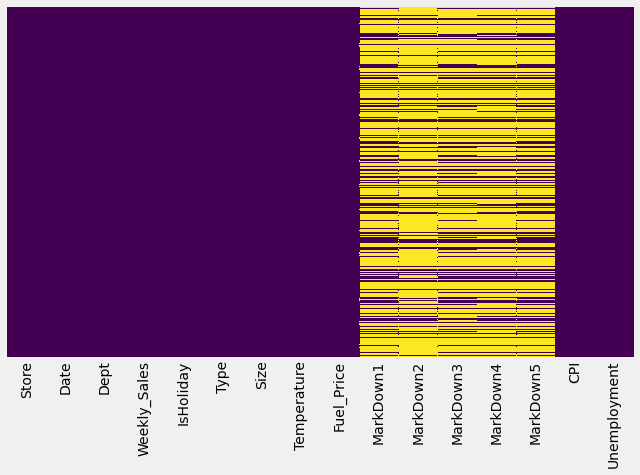

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

sns_heatmap = sns.heatmap(df.sample(int(0.1 * df.shape[0])).isnull(), 
                          yticklabels=False, 
                          cbar=False, 
                          cmap='viridis')

In [9]:
ans2 = len(none_count[none_count > 60.0])

In [10]:
df = df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

In [11]:
# проверка, что задание решено корректно
assert ans2 > 4
assert ans2 < 10

# Подобные тесты скрыты от вас 

__г)__ Сколько уникальных магазинов есть в данных? Запишите их число в переменную `ans3`. Сколько уникальных отделов есть в данных? Запишите их число в переменную `ans4`. За какой диапазон у нас присутствуют данные? Запишите этот диапазон, выраженный в числе дней, в переменную `ans5`. 

In [12]:
ans3 = len(df['Store'].unique())
ans4 = len(df['Dept'].unique())
ans5 = int((str(df['Date'].max() - df['Date'].min()).split())[0])

In [13]:
# проверка, что задание решено корректно
assert ans3 < 50
assert ans4 > 80
assert ans5 > 900

# Подобные тесты скрыты от вас 

__д)__ Посмотрим на динамику продаж в магазинах в целом. Для этого построим график, где по оси $x$ будет отложена дата, а по оси $y$ продажи по всей сети Walmart.В какой день наблюдаются максимальные продажи? Запишите дату этого дня в переменную `ans6` в формате `год-месяц-день`.
 

In [14]:
df_sales = df.groupby('Date').agg({'Weekly_Sales': 'sum'})

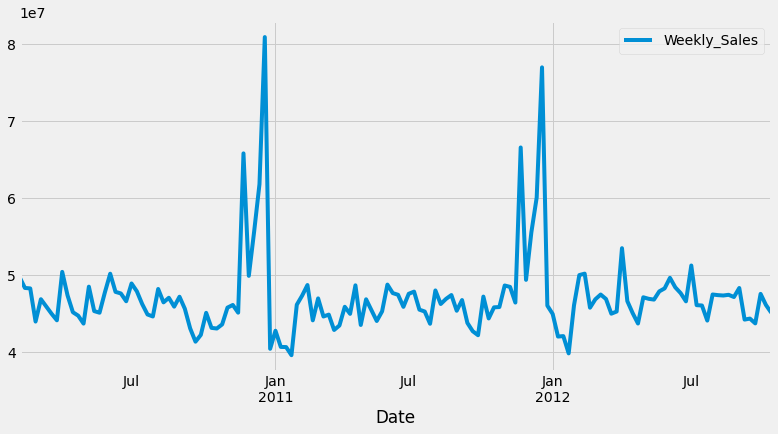

In [15]:
df_sales.plot(figsize=(12,6));

In [16]:
df_sales = df_sales.sort_values(by='Weekly_Sales', ascending=False)

In [17]:
df_sales.reset_index(inplace=True)

In [18]:
df_sales.head()

,Date,Weekly_Sales
0,2010-12-24,80931415.60
1,2011-12-23,76997324.41
2,2011-11-25,66589459.29
3,2010-11-26,65821003.24
4,2010-12-17,61820531.01


In [19]:
ans6 = str(df_sales['Date'][0]).split()[0]

In [20]:
# проверка, что задание решено корректно
assert ans6.split('-')[-1] == '24'

# Подобные тесты скрыты от вас 

__е)__ Найдите и нарисуйте матрицу корреляции для числовых показателей. Какие два показателя коррелируют сильнее всего? Запишите модуль получившегося значения в переменную `ans7` (корреляция мб отрицательной). 

При строительстве матрицы не надо брать в расчёт номер магазина, номер отдела и размер магазина, так как их взаимосвязь с другими показателями не имеет никакого смысла.


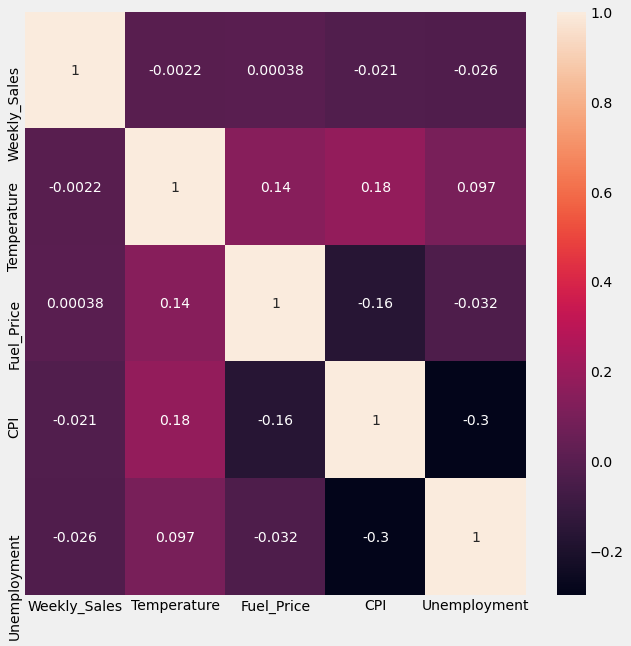

In [21]:
df_new = df.drop(['Date', 'IsHoliday', 'Type', 'Dept', 'Store', 'Size'], axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(), annot = True);

In [22]:
ans7 = abs(df_new['Unemployment'].corr(df_new['CPI']))

Постройте между этими же переменными облака рассеивания методом `sns.pairplot`. Не надо строить эту визуализацию сразу же для всех точек, которые есть в данных. Отберите случайные $10\%$ наблюдений для картинки с помощью метода `.sample( )`.


In [23]:
df_corr = pd.DataFrame()
df_corr['Unemployment'] = df['Unemployment']
df_corr['CPI'] = df['CPI']

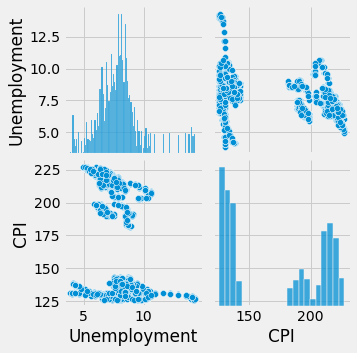

In [24]:
sns.pairplot(df_corr.sample(int(0.1 * df.shape[0])));

In [25]:
# проверка, что задание решено корректно
assert ans7 > 0.2
assert ans7 < 0.35

# Подобные тесты скрыты от вас 

__ё)__  Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.

In [26]:
df.groupby('Store').agg({'Weekly_Sales': 'sum'}).sort_values(by='Weekly_Sales', ascending=False).head()

,Weekly_Sales
Store,
20,2.993660e+08
4,2.973940e+08
14,2.872952e+08
13,2.844811e+08
2,2.735476e+08


__ж)__ Найдите топ-10 самых больших отделов по суммарным продажам среди магазинов с типом А.

In [27]:
top10 = (
    df.query("Type == 'A'").groupby('Dept').agg({'Weekly_Sales': 'sum'})
    .sort_values(by='Weekly_Sales', ascending=False).head(10)
)
top10

,Weekly_Sales
Dept,
92,3.503512e+08
95,3.034455e+08
90,2.203874e+08
38,2.031445e+08
72,1.774588e+08
91,1.679659e+08
40,1.675846e+08
2,1.624953e+08
94,1.595790e+08
